In [31]:
import pandas as pd
#biblioteca oficial do mysql
import mysql.connector
#Warning
import warnings
warnings.filterwarnings('ignore')

#Dados do banco de dados db4free
host = 'db4free.net'
database = 'aulaletscode'
user = 'viniciusmdea'
password = 'testeQ123'
port = 3306

In [32]:
con = mysql.connector.connect(user=user, 
                              password=password,
                              host=host,
                              database=database)
cursor = con.cursor()


df = pd.read_sql_query("SELECT * from ImovelWeb_Compra", con)

con.close()

In [33]:
import seaborn as sns

In [34]:
df.head()

,index,preço,End,Quartos,Banheiros,Area
0,0,549000.0,Saúde,3.0,2.0,75
1,1,730000.0,Saúde,3.0,2.0,87
2,2,400000.0,Saúde,2.0,1.0,64
3,3,354253.0,Tatuapé,2.0,NaN,47
4,4,695000.0,Saúde,3.0,2.0,78


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 6 columns):
index        4139 non-null int64
preço        4139 non-null float64
End          4139 non-null object
Quartos      4080 non-null float64
Banheiros    3903 non-null float64
Area         4111 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 194.1+ KB


In [36]:
df = df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 4138
Data columns (total 6 columns):
index        3844 non-null int64
preço        3844 non-null float64
End          3844 non-null object
Quartos      3844 non-null float64
Banheiros    3844 non-null float64
Area         3844 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 210.2+ KB


In [39]:
def tratArea(valor):
    if not valor.isdigit():
        return 
    else:
        return float(valor)
df.Area = df.Area.apply(tratArea)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 4138
Data columns (total 6 columns):
index        3844 non-null int64
preço        3844 non-null float64
End          3844 non-null object
Quartos      3844 non-null float64
Banheiros    3844 non-null float64
Area         3843 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 210.2+ KB


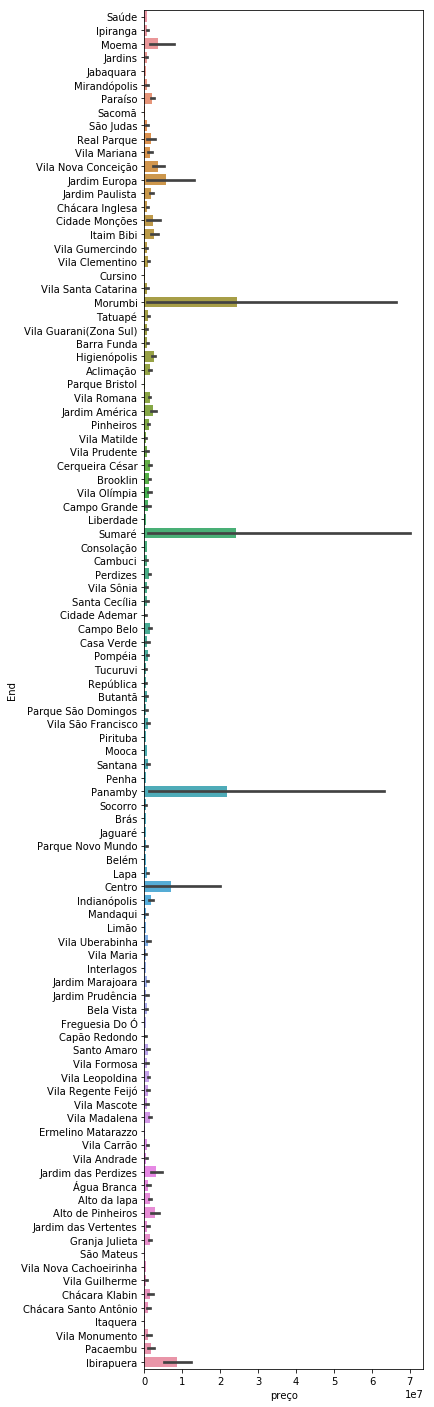

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,25))
sns.barplot(data=df,x='preço',y='End')

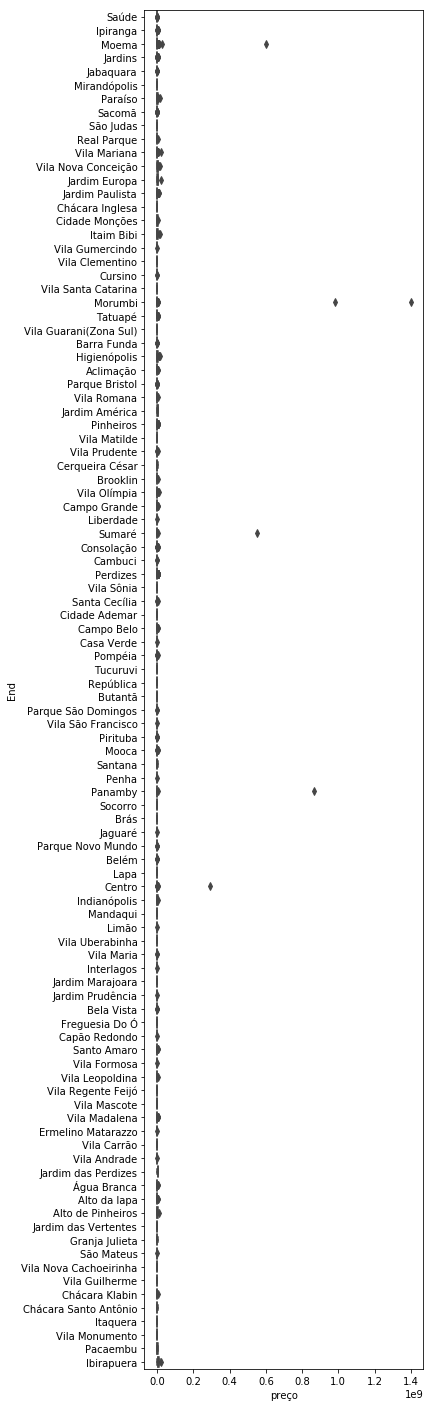

In [42]:
plt.figure(figsize=(5,25))
sns.boxplot(data=df,x='preço',y='End')

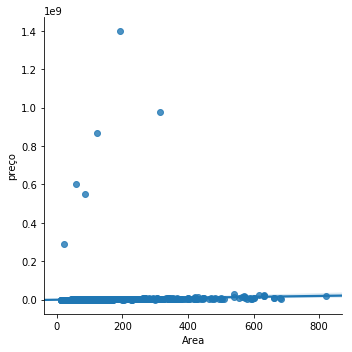

In [43]:
sns.lmplot(data=df,x='Area',y='preço')

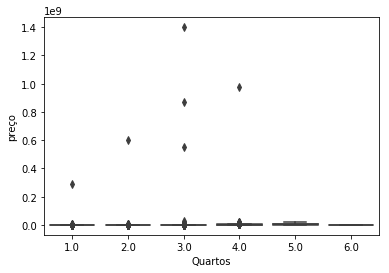

In [44]:
import numpy as np
sns.boxplot(data=df,x='Quartos',y='preço')

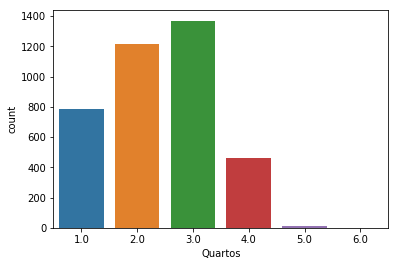

In [45]:
sns.countplot(df['Quartos'])

In [46]:
df.Quartos.value_counts()

3.0    1369
2.0    1216
1.0     785
4.0     459
5.0      14
6.0       1
Name: Quartos, dtype: int64

In [47]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
RandomForestRegressordf.dropna()

NameError: name 'RandomForestRegressordf' is not defined

In [49]:
y = df['preço']
x = df.drop(['index','preço'],axis=1)
x = pd.get_dummies(x) 

In [ ]:
xTreino,xTeste,yTreino,yTeste = train_test_split(x,y)

In [ ]:
modelo = RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
error = mean_absolute_error(valores,yTeste)

In [ ]:
error/y.mean()